In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from landlab import RasterModelGrid
from plume import Plume

# Run a 2D Plume

Create a grid on which we will solve for sediment concentrations of the hypopycnal plume

In [3]:
grid = RasterModelGrid((500, 500), spacing=(100., 100.))

Set input parameters for the plume. Units are MKS.

In [4]:
params = {
    'river_velocity': 1.5,
    'river_width': 50.,
    'river_depth': 5.,
    'river_loc': (0., 25000.),
    'ocean_velocity': .015,
    'river_angle': np.deg2rad(0.),
}

Create an instance of a plume and solve.

In [5]:
plume = Plume(grid, **params)
plume.run_one_step()

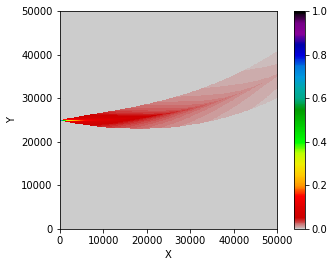

In [6]:
grid.imshow('node', 'sediment~suspended__mass_concentration', cmap='nipy_spectral_r')

# Run a 1D Plume

Create a "1D" grid.

In [7]:
grid = RasterModelGrid((3, 500), spacing=(10000., 100.))

In [8]:
params = {
    'river_velocity': 1.5,
    'river_width': 50.,
    'river_depth': 5.,
    'river_loc': (0., 10000.),
    'ocean_velocity': 0.,
    'river_angle': np.deg2rad(0.),
}

In [9]:
plume = Plume(grid, **params)
plume.run_one_step()

Plot concentrations alongs the centerline. Because the grid has three rows of nodes, plot the middle row for the "centerline".

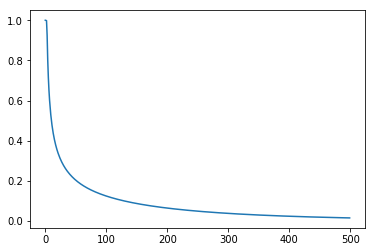

In [10]:
plt.plot(grid.at_node['sediment~suspended__mass_concentration'].reshape((3, -1))[1])